In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np #numerical python
# Google Funktion: Shortcut für Ausführung des Codes und Erstellen eines neuen Codeblocks -> Shift+Eingabe
# Bei Änderungen jeweiligen Block nochmal neu ausführen -> Aktualisierung. Alle Blöcke ausführen -> Ctrl+F9

In [2]:
digits = load_digits() #Datensatz in Variable gespeichert

In [3]:
digits.keys() #Keys des Datensatzes anzeigen lassen

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits["target"][0]) #zeigt die tatsächliche behandelte Zahl im Datensatz an auf Grundlage des Keys target. Kontrolle für richtige Annahmen mit Ausgabe der jwlg. Keys

0


In [5]:
digits["data"].shape #gibt Anzahl von Daten im Datensatz und Format an (Anzahl, Format: hier 8x8)

(1797, 64)

In [6]:
def plot_image(pixelmap, ax = None): #Funktionen der jeweiligen Datentyps -> Datentyp.Funktion. Mehr Möglichkeiten und Informationen zu den jeweiligen Funktionen in Python Dokumentation: https://docs.python.org/3/ oder https://matplotlib.org/stable/index.html
  if not ax:
    ax = plt.gca() # gca-Funktion: get current axes -> [Wert der momentanen Achse verwenden]

  ax.set_yticks([]); ax.set_xticks([]) #punkte für x- und y-achsen setzen -> [Daten müssten in Datensatz enthalten sein]
  ax.imshow(np.reshape(pixelmap, (8,8))) #plot shapen auf 8x8



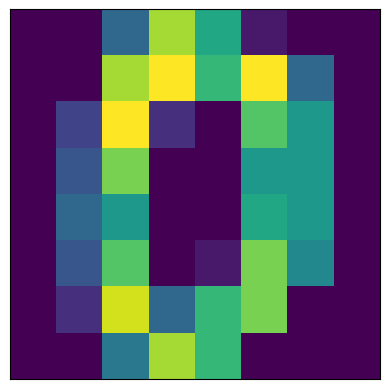

In [21]:
plot_image(digits["data"][0]) # zeigt die jeweilige Position vom key "data" im Datensatz an

# Funktion macht händisches überprüfen/analysieren von Datensatz möglich durch plotten der Pixel(Features) und frühere Ausgabe: print(digits["target"][n])

In [8]:
# nächster Step Machine Learning. Großteil des Datensatzes (bspw.70 %) wird genutzt um Algorhythmus zu trainieren (mit vorgegebenen Daten und richtigen Antworten)
# und kleinerer Teil des Datensatzes (bspw. 30 %), um seine Funktionalität zu überprüfen (Nur mit vorgegebenen Daten)

from sklearn.model_selection import train_test_split # Aufsplitten in Trainings- und Testdaten

In [9]:
# Vier neue Datensätze sind nötig, je zwei a Trainingsdatensatz und Testdatensatz: a. Datensatz, der nur Pixel(Features) enthält, b. Datensatz der nur labels(Zielvariable/target)
X_train, X_test, Y_train, Y_test = train_test_split(digits["data"], digits["target"], test_size = 0.3) #Angabe in der Reihenfolge ist eine Konvention (X= features/pixels, Y= labels/Zielvariablen)

In [10]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape # Überblick über Anzahl der Daten in den jeweiligen Datensätzen und das Format

((1257, 64), (540, 64), (1257,), (540,))

In [11]:
# Im Bereich Data Science sind sehr viele Vorbereitungen und Vorscript nötig, bevor es zur Durchführung kommt (Damit die Durchführung auch richtig und qualitativ hochwertig ist)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() #clf = classifier

In [13]:
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

5

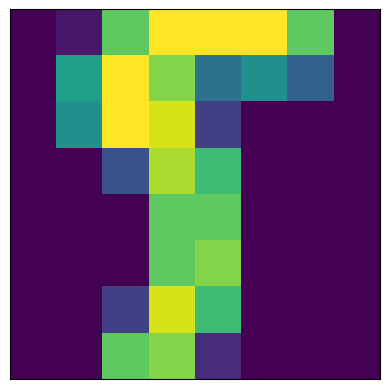

In [14]:
n = 3
plot_image(X_test[n]) #Kreiert eine Anzeige für den X_test Datensatz mit der jeweiligen Nummer des Datensatzes n. So kann man händisch auf Beispiele überprüfen

pred = clf.predict(X_test[n].reshape(1, -1)) # Warum hier reshape mit den Werte 1,-1? Wahrscheinlich nötiges Format für die Funktion predict (-> Wechsel der Achsen? zweite Zahl 0 Änderung der bisherigen Achse?)
pred[0] # Wert der Variable wird ausgegeben -> kleine Zahl über Bild

In [18]:

from sklearn.metrics import accuracy_score # ermittelt Erkennungswert/Effizienz/Akkuratesse/Akkuratheit des Algorhytmus. Teilt vorhandene Datenanzahl durch richtig erkannte Datenanzahl
pred = clf.predict(X_test) # hier ganzer Datensatz genutzt und nicht nur eine Ziffer, kein reshape nötig
accuracy_score(Y_test, pred) # Abgleich der richtigen Werte mit der prediction vom Algorhythmus


0.9648148148148148